In [1]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
import io
import seaborn as sns

In [2]:
df= pd.read_csv('Datarobot Churn data.csv')

In [3]:
df['is_churn'] = np.where(df['is_churn'].str.contains('yes'), 1, 0)

In [4]:
df = df.drop(columns = 'SHOP_ID')

In [6]:
df_train = df
df_train.head()

,active_length,is_churn,Parcel_count,Average_days_between_parcels,ISD,SUBURBS,OSD,Success_Rate_of_ISD,Success_Rate_of_SUBURB,Success_Rate_of_OSD_HUB,...,Extend_of_breach_in_hr,Extend_of_breach_in_hr_ISD,Extend_of_breach_in_hr_SUB,Extend_of_breach_in_hr_OSD,return_tat_in_days,issues_raised,issues_resolved,area_changes,damaged,creation_to_received_in_hours
0,179,0,96,1.854167,49,11,36,1.000000,0.846154,1.000000,...,44.578947,17.333333,69.000000,48.400000,NaN,12.0,10.0,2.0,NaN,9.919192
1,243,1,44,5.522727,21,2,21,0.952381,1.000000,1.000000,...,65.315789,86.777778,23.000000,48.555556,18.687500,3.0,3.0,NaN,1.0,26.234043
2,100,1,65,1.538462,44,7,14,0.977778,1.000000,1.000000,...,63.714286,44.333333,NaN,78.250000,NaN,5.0,5.0,NaN,NaN,10.476923
3,159,1,228,0.697368,136,10,82,0.992701,1.000000,0.975904,...,28.973684,25.777778,26.666667,32.764706,2.728448,4.0,4.0,10.0,1.0,6.210117
4,212,0,159,1.333333,18,13,128,1.000000,1.000000,0.992248,...,42.517241,36.000000,42.000000,42.777778,4.520833,6.0,3.0,1.0,NaN,9.335366


In [7]:
df_train = df_train.fillna(0)

In [8]:
df_train2 = df_train
correlations = df_train2.corrwith(df_train.is_churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = True)

In [ ]:
correlations.plot.bar(
        figsize = (50, 25), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "25", fontfamily = "sans-serif")
plt.savefig('Correlation with ChurnRate_2.png')

In [10]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [11]:
x = df_train.drop(columns='is_churn')
y = df_train['is_churn']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [13]:
clf = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth = 3)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [14]:
feature_col = list(x)
print(list(x))

['active_length', 'Parcel_count', 'Average_days_between_parcels', 'ISD', 'SUBURBS', 'OSD', 'Success_Rate_of_ISD', 'Success_Rate_of_SUBURB', 'Success_Rate_of_OSD_HUB', 'SLA_AVG', 'Issue_parcels', 'number_of_times_issues_raised', 'Issue_resolution_tat', 'second_mile_tat_hr', 'E2E_TAT_day', 'E2E_TAT_ISD_day', 'E2E_TAT_SUB_day', 'E2E_TAT_OSD_day', 'Extend_of_breach_in_hr', 'Extend_of_breach_in_hr_ISD', 'Extend_of_breach_in_hr_SUB', 'Extend_of_breach_in_hr_OSD', 'return_tat_in_days', 'issues_raised', 'issues_resolved', 'area_changes', 'damaged', 'creation_to_received_in_hours']


In [ ]:
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(clf, 
                   feature_names=feature_col,  
                   class_names=['0','1'],
                   filled=True)

In [16]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 10)
clf_entropy = clf_entropy.fit(x_train,y_train)
y_pred = clf_entropy.predict(x_test)

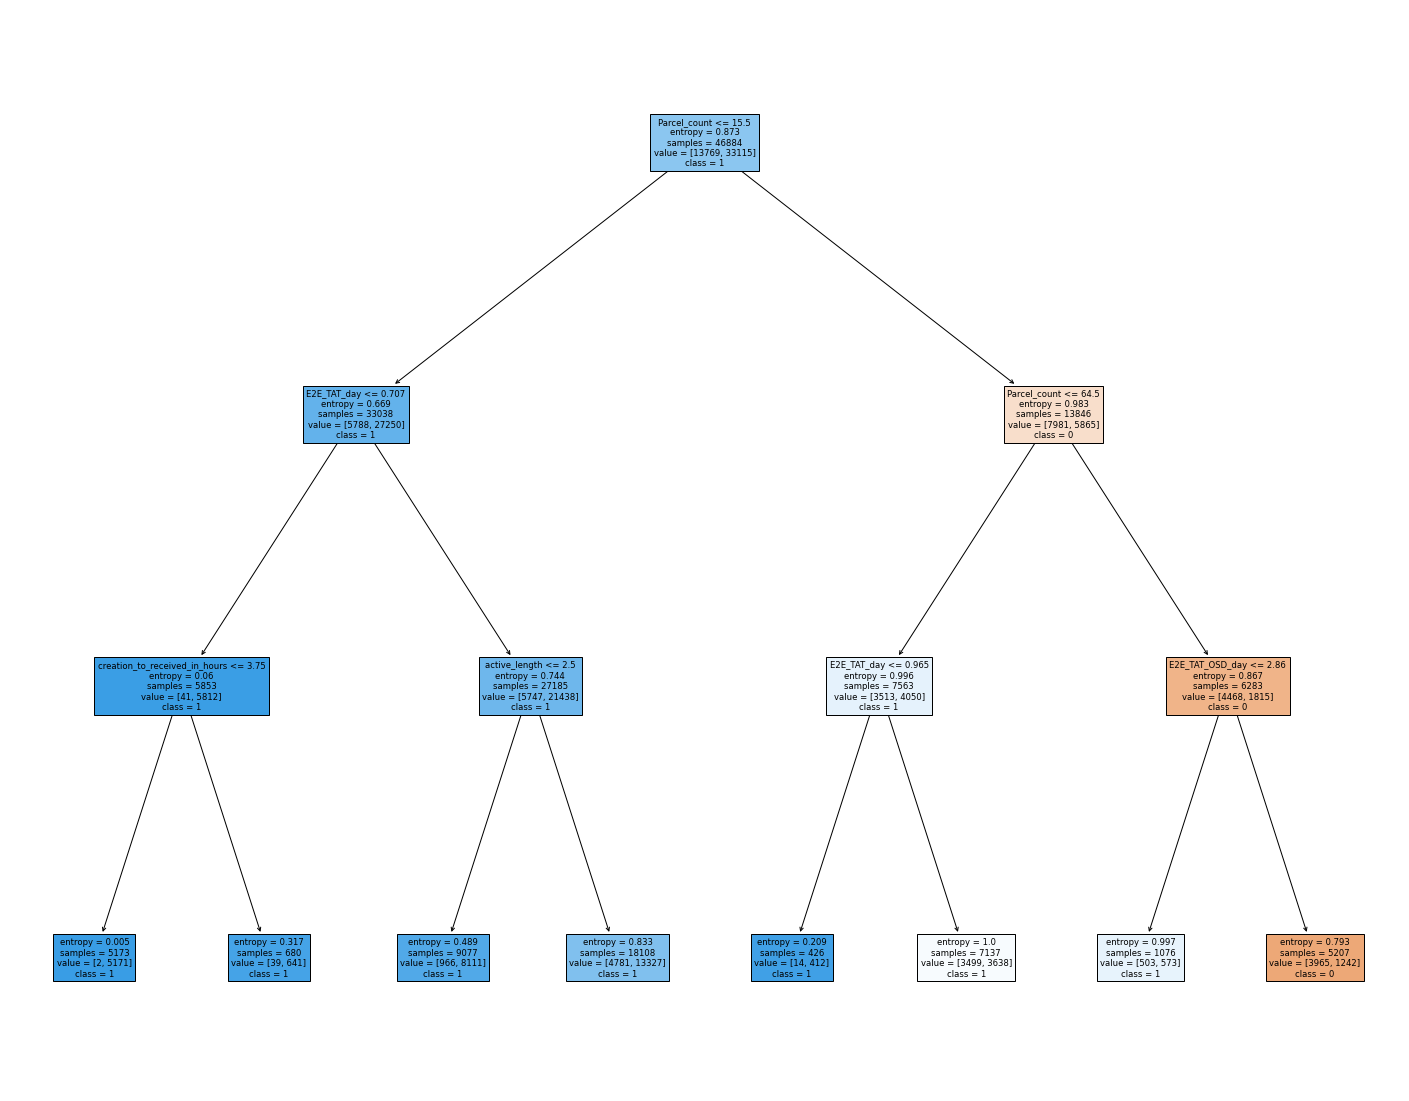

In [17]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_entropy, 
                   feature_names=feature_col,  
                   class_names=['0','1'],
                   filled=True)
plt.savefig('entropy_2.png')

In [18]:
for i, column in enumerate(df_train.drop('is_churn', axis =1)):
    print('Importance of feature {}: {:.4f}'.format(column,clf_entropy.feature_importances_[i]))

    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [clf_entropy.feature_importances_[i]]})

    try:
        final_fi_6 = pd.concat([final_fi_6,fi], ignore_index=True)
    except:
        final_fi_6 = fi

final_fi_6 = final_fi_6.sort_values('Feature Importance Score', ascending= False).reset_index()
final_fi_6.to_csv('Importance_Score.csv')

Importance of feature active_length: 0.0811
Importance of feature Parcel_count: 0.6671
Importance of feature Average_days_between_parcels: 0.0000
Importance of feature ISD: 0.0000
Importance of feature SUBURBS: 0.0000
Importance of feature OSD: 0.0000
Importance of feature Success_Rate_of_ISD: 0.0000
Importance of feature Success_Rate_of_SUBURB: 0.0000
Importance of feature Success_Rate_of_OSD_HUB: 0.0000
Importance of feature SLA_AVG: 0.0000
Importance of feature Issue_parcels: 0.0000
Importance of feature number_of_times_issues_raised: 0.0000
Importance of feature Issue_resolution_tat: 0.0000
Importance of feature second_mile_tat_hr: 0.0000
Importance of feature E2E_TAT_day: 0.2106
Importance of feature E2E_TAT_ISD_day: 0.0000
Importance of feature E2E_TAT_SUB_day: 0.0000
Importance of feature E2E_TAT_OSD_day: 0.0284
Importance of feature Extend_of_breach_in_hr: 0.0000
Importance of feature Extend_of_breach_in_hr_ISD: 0.0000
Importance of feature Extend_of_breach_in_hr_SUB: 0.0000
Im

In [19]:
from sklearn.preprocessing import KBinsDiscretizer

In [20]:
cols = ['active_length', 'is_churn', 'Parcel_count',
       'Average_days_between_parcels', 'ISD', 'SUBURBS', 'OSD',
       'Success_Rate_of_ISD', 'Success_Rate_of_SUBURB',
       'Success_Rate_of_OSD_HUB', 'SLA_AVG', 'Issue_parcels',
       'number_of_times_issues_raised', 'Issue_resolution_tat',
       'second_mile_tat_hr', 'E2E_TAT_day', 'E2E_TAT_ISD_day',
       'E2E_TAT_SUB_day', 'E2E_TAT_OSD_day', 'Extend_of_breach_in_hr',
       'Extend_of_breach_in_hr_ISD', 'Extend_of_breach_in_hr_SUB',
       'Extend_of_breach_in_hr_OSD', 'return_tat_in_days', 'issues_raised',
       'issues_resolved', 'area_changes', 'damaged',
       'creation_to_received_in_hours']

In [21]:
kbins = KBinsDiscretizer(n_bins = 2, encode = 'ordinal', strategy ='uniform')
df_train_transformed = kbins.fit_transform(df_train)


In [22]:
df_transformed_1 = pd.DataFrame(df_train_transformed, columns=cols)

In [23]:
from mlxtend.frequent_patterns import apriori, association_rules

In [33]:
churn_reasons = apriori(df_transformed_1, min_support = 0.1, use_colnames = True)

rules = association_rules(churn_reasons, metric ="confidence", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())
rule_csv = rules.to_csv('rules_original.csv')

                                          antecedents  \
31  (Success_Rate_of_OSD_HUB, Success_Rate_of_SUBURB)   
37  (Success_Rate_of_OSD_HUB, is_churn, Success_Ra...   
7                            (Success_Rate_of_SUBURB)   
32      (Success_Rate_of_ISD, Success_Rate_of_SUBURB)   
11                           (Success_Rate_of_SUBURB)   

                  consequents  antecedent support  consequent support  \
31      (Success_Rate_of_ISD)            0.329079            0.773129   
37      (Success_Rate_of_ISD)            0.152425            0.773129   
7       (Success_Rate_of_ISD)            0.406904            0.773129   
32  (Success_Rate_of_OSD_HUB)            0.349367            0.644183   
11  (Success_Rate_of_OSD_HUB)            0.406904            0.644183   

     support  confidence      lift  leverage  conviction  
31  0.299423    0.909883  1.176884  0.045003    2.517511  
37  0.134952    0.885369  1.145176  0.017108    1.979139  
7   0.349367    0.858599  1.110550  0.034

In [34]:
print(rules)

                                          antecedents  \
31  (Success_Rate_of_OSD_HUB, Success_Rate_of_SUBURB)   
37  (Success_Rate_of_OSD_HUB, is_churn, Success_Ra...   
7                            (Success_Rate_of_SUBURB)   
32      (Success_Rate_of_ISD, Success_Rate_of_SUBURB)   
11                           (Success_Rate_of_SUBURB)   
13                 (is_churn, Success_Rate_of_SUBURB)   
39  (is_churn, Success_Rate_of_ISD, Success_Rate_o...   
35                           (Success_Rate_of_SUBURB)   
0                                          (is_churn)   
26                 (is_churn, Success_Rate_of_SUBURB)   
8                           (Success_Rate_of_OSD_HUB)   
30     (Success_Rate_of_OSD_HUB, Success_Rate_of_ISD)   
1                               (Success_Rate_of_ISD)   
44                 (is_churn, Success_Rate_of_SUBURB)   
4                           (Success_Rate_of_OSD_HUB)   
18                (Success_Rate_of_OSD_HUB, is_churn)   
9                              

In [35]:
rules["consequents"] = rules["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
rules["antecedents"] = rules["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

In [36]:
for index,row in rules.iterrows():
    if str(row['consequents']) == 'is_churn':
        print(row)

antecedents           Success_Rate_of_ISD
consequents                      is_churn
antecedent support               0.773129
consequent support                0.70631
support                          0.513872
confidence                       0.664666
lift                              0.94104
leverage                        -0.032196
conviction                       0.875813
Name: 1, dtype: object
antecedents           Success_Rate_of_OSD_HUB
consequents                          is_churn
antecedent support                   0.644183
consequent support                    0.70631
support                              0.405778
confidence                            0.62991
lift                                 0.891833
leverage                            -0.049215
conviction                           0.793564
Name: 4, dtype: object
antecedents           Success_Rate_of_OSD_HUB, Success_Rate_of_ISD
consequents                                               is_churn
antecedent support          

In [37]:
df_ischurn = rules[rules['consequents']=='is_churn']

In [38]:
df_exportcsv = df_ischurn.to_csv('Churn_Rules.csv')